In [1]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd
from algorithms import *
from data_gen import *
from spectrum_gen import *
from visualizations import *
from analysis import *
from comparisons import *
# Press ⌃R to execute it or replace it with your code.
# Press Double ⇧ to search everywhere for classes, files, tool windows, actions, and settings.

adata_neg , adata_pos = read_chlamydomonas_files(n_obs=3000)



In [2]:
sc.pp.filter_cells(adata_neg, min_genes=100)
sc.pp.filter_cells(adata_pos, min_genes=100)
sc.pp.normalize_per_cell(adata_neg, counts_per_cell_after=1e4)
sc.pp.log1p(adata_neg)
sc.pp.normalize_per_cell(adata_pos, counts_per_cell_after=1e4)
sc.pp.log1p(adata_pos)



In [3]:
prepare_data_for_ccremover(adata_neg=adata_neg,adata_pos=adata_pos)

In [5]:
#R code:
#if_cc_pos_bin <- !!if_cc_pos
#mean_gene_exp <- rowMeans(B_pos)
#B_centered <- B_pos - mean_gene_exp
#dat <- list(x=B_centered, if_cc=if_cc_pos_bin)
#xhat_pos <- ccRemover(dat, bar=FALSE,nboot=15)
#write.table(format(xhat_pos, scientific=FALSE), file = paste('./', "xhat_pos.csv", sep="/"), sep=",")

#if_cc_neg_bin <- !!if_cc_neg
#mean_gene_exp <- rowMeans(B_neg)
#B_centered <- B_neg - mean_gene_exp
#dat <- list(x=B_centered, if_cc=if_cc_neg_bin)
#xhat_neg <- ccRemover(dat, bar=FALSE,nboot=15)
#write.table(format(xhat_neg, scientific=FALSE), file = paste('./', "xhat_neg.csv", sep="/"), sep=",")


In [6]:
bdata_neg = adata_neg.copy()
bdata_pos = adata_pos.copy()

silhoutte score before : 9.815216e-06
davies_bouldin_score: 6759170.719250095
calinski_harabasz_score: 1.2936956177817767e-10


/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'FE' as categorical


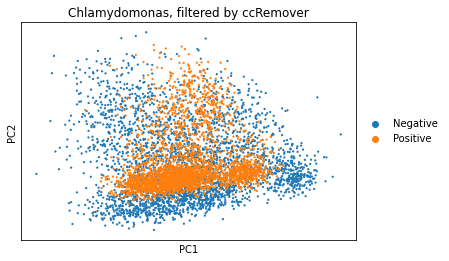

In [8]:
neg_X  = pd.read_csv("xhat_neg.csv")
neg_X = neg_X.to_numpy()
bdata_neg.X = neg_X.T
pos_X  = pd.read_csv("xhat_pos.csv")
pos_X = pos_X.to_numpy()
bdata_pos.X = pos_X.T

bdata_unit = bdata_neg.concatenate(bdata_pos)
labels = bdata_unit.obs["FE"]
print("silhoutte score before : " +str(silhouette_score(bdata_unit.X,labels)))
print("davies_bouldin_score: "+str(davies_bouldin_score(bdata_unit.X,labels)))
print("calinski_harabasz_score: "+str(calinski_harabasz_score(bdata_unit.X,labels)))
sc.tl.pca(bdata_unit)
sc.pl.pca(bdata_unit,color="FE" ,title="Chlamydomonas, filtered by ccRemover")
